# Import library and Preparing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

import pickle

In [2]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS.csv", parse_dates=['Date'])

Mari kita cek dimensi data yang kita miliki.

In [3]:
df.shape

(145460, 23)

Dimensi data:
- 23 kolom
- 145.460 baris

Lihat lima data teratas dari df.

In [4]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


Cek informasi mengenai dataset yang kita miliki.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Dari informasi diatas, diketahui bahwa ada banyak sekali atribut yang memiliki nilai null, untuk itu penting sekali untuk kita melakukan cleaning data terlebih dahulu.

# Cleaning Data

Sebelum pemrosesan data kita lakukan untuk keperluan Machine Learning, kita perlu membersihkan data terlebih dahulu, selain agar mendapatkan akurasi data yang bagus kita juga jadi lebih mudah nantinya saat mengolah data tersebut.

**Periksa apakah ada nilai null atau tidak.**

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Wah banyak sekali, untuk ini mari lakukan **dropna**.

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Berhasil! Nilai null sudah teratasi.

**Periksa apakah ada nilai terduplikat atau tidak.**

In [8]:
df.duplicated().sum()

0

Tidak ada nilai terduplikat. 

Yeay! Sekarang data kita sudah benar-benar bersih, selanjutnya kita perlu merapihkan data karena masih perlu diperiksa kembali apakah data-data ini sudah berisikan tipe data dan kolom-kolom yang memang kita perlukan atau tidak.

In [9]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

# Exploratory Data Analysis

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2012.221074,6.425009,15.723910
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,2.450978,3.451383,8.782527
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,2010.000000,3.000000,8.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,2012.000000,6.000000,16.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,2014.000000,9.000000,23.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


## Distribusi RainToday vs RainTomorrow

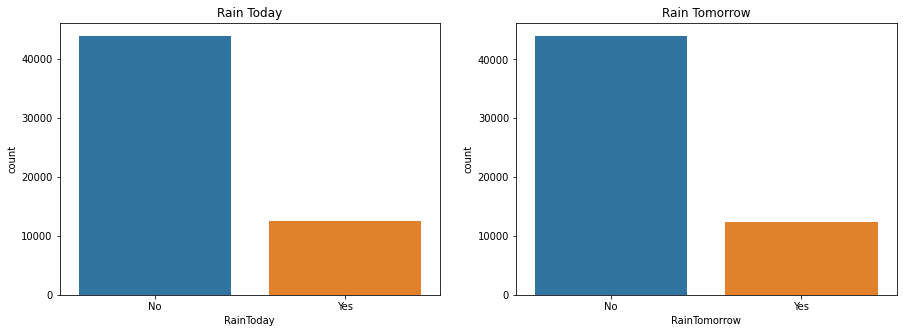

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot (x='RainToday', data=df)
plt.title('Rain Today')

plt.subplot(1,2,2)
sns.countplot (x='RainTomorrow', data=df)
plt.title('Rain Tomorrow')

plt.show()

## Kurva RainToday vs RainToday berdasarkan Year, Month, dan Day

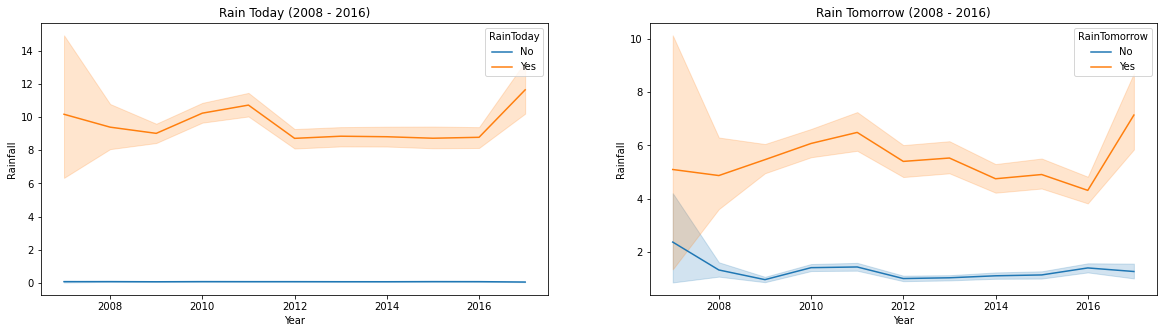

In [12]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.lineplot (x='Year', y='Rainfall', hue='RainToday', data=df)
plt.title('Rain Today (2008 - 2016)')

plt.subplot(1,2,2)
sns.lineplot (x='Year', y='Rainfall', hue='RainTomorrow', data=df)
plt.title('Rain Tomorrow (2008 - 2016)')

plt.show()

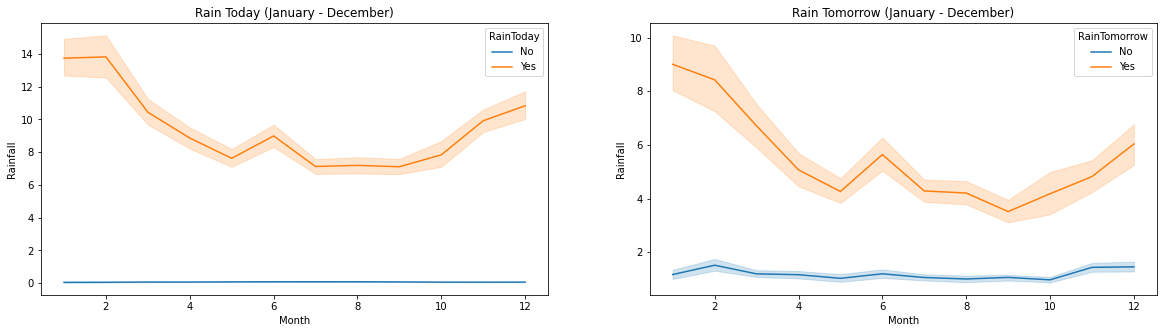

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.lineplot (x='Month', y='Rainfall', hue='RainToday', data=df)
plt.title('Rain Today (January - December)')

plt.subplot(1,2,2)
sns.lineplot (x='Month', y='Rainfall', hue='RainTomorrow', data=df)
plt.title('Rain Tomorrow (January - December)')

plt.show()

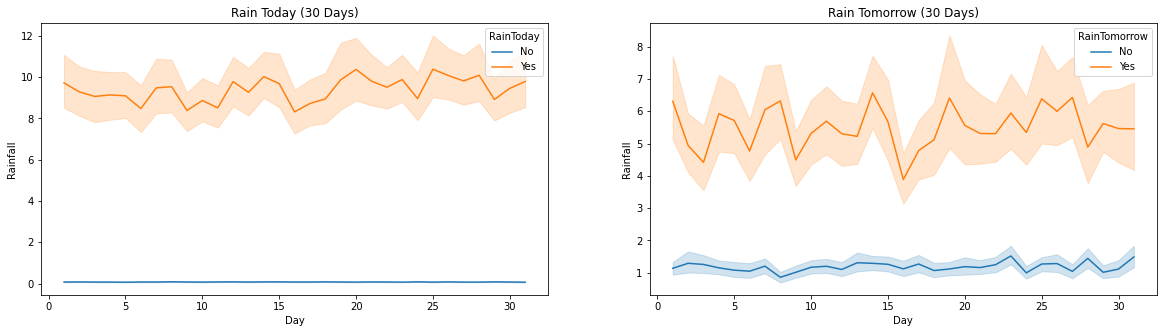

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.lineplot (x='Day', y='Rainfall', hue='RainToday', data=df)
plt.title('Rain Today (30 Days)')

plt.subplot(1,2,2)
sns.lineplot (x='Day', y='Rainfall', hue='RainTomorrow', data=df)
plt.title('Rain Tomorrow (30 Days)')

plt.show()

## 

# Preprocessing Data

In [15]:
df.drop(columns=['Date','Year', 'Month', 'Day'], inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Location'] = label.fit_transform(df['Location'])
df['WindGustDir'] = label.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label.fit_transform(df['WindDir3pm'])
df['RainToday'] = label.fit_transform(df['RainToday'])
df['RainTomorrow'] = label.fit_transform(df['RainTomorrow'])

df.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0


## Features Selection

Mari kita lihat atribut mana saja yang memiliki hubungan paling dekat dengan target kita yaitu **RainTomorrow**, gunakan heatmap untuk lebih mudah melihatnya.

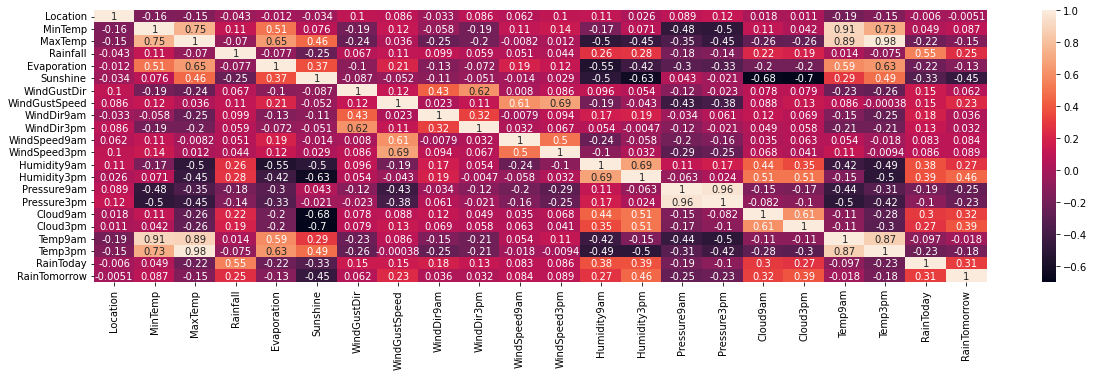

In [17]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)

Dari heatmap diatas terlihat jelas terdapat 6 atribut yang memiliki hubungan paling baik dengan RainTomorrow, yaitu:
- RainToday: (0.31)
- Cloud9am: (0.32)
- Cloud3pm: (0.39)
- Humidity9am: (0.27)
- Humidity3pm: (0.46)
- Rainfall: (0.25)

Mari buat dataframe baru untuk menggabungkan ketujuh atribut tersebut.

In [18]:
final_df = pd.DataFrame(df[['RainTomorrow', 'RainToday', 'Cloud9am', 'Cloud3pm', 'Humidity9am', 'Humidity3pm', 
            'Rainfall']])

# Modelling: Logistic Regression

## Prediksi Apakah besok hujan?

In [19]:
scaler = StandardScaler()
datax = final_df.drop(['RainTomorrow'], axis=1)

In [20]:
X = scaler.fit_transform(datax)
y = final_df['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
logres = LogisticRegression()
logres.fit(x_train, y_train)

LogisticRegression()

In [22]:
LogisticRegression(C=1.0,
                   class_weight=None,
                   dual=False,
                   fit_intercept=True,
                   intercept_scaling=1,
                   l1_ratio=None,
                   max_iter=100,
                   multi_class='auto',
                   n_jobs=None,
                   penalty='l2',
                   random_state=None,
                   solver='lbfgs',
                   tol=0.0001,
                   verbose=0,
                   warm_start=False)

LogisticRegression()

In [23]:
lr_pred = logres.predict(x_test)
print("Test score:", logres.score(x_test, y_test))
print("Train score:", logres.score(x_train, y_train))

Test score: 0.8302020560085076
Train score: 0.8387096774193549


In [24]:
print("Accuracy Score: ", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Accuracy Score:  0.8302020560085076
[[8284  511]
 [1405 1084]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      8795
           1       0.68      0.44      0.53      2489

    accuracy                           0.83     11284
   macro avg       0.77      0.69      0.71     11284
weighted avg       0.82      0.83      0.82     11284



In [25]:
# Saving Model with Pickle
pickle.dump(logres, open('logres_besok.pkl', 'wb'))

# Modelling: Support Vector Machine (SVM)

## Prediksi Apakah besok hujan?

In [26]:
scaler = StandardScaler()
datax1 = final_df.drop(['RainTomorrow'], axis=1)

In [27]:
X = scaler.fit_transform(datax1)
y = final_df['RainTomorrow']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2)

In [28]:
svm_model = svm.SVC()
svm_model.fit(x_train_s, y_train_s)

SVC()

In [29]:
svm.SVC(C=1.0,
    break_ties=False,
    cache_size=200,
    class_weight=None,
    coef0=0.0,
    decision_function_shape='ovr',
    degree=3,
    gamma='scale',
    kernel='rbf',
    max_iter=-1,
    probability=False,
    random_state=None,
    shrinking=True,
    tol=0.001,
    verbose=False)

SVC()

In [30]:
pred_svm = svm_model.predict(x_test_s)
print("Test score:", svm_model.score(x_test_s, y_test_s))
print("Train score:", svm_model.score(x_train_s, y_train_s))

Test score: 0.8431407302375045
Train score: 0.8394629563984403


In [31]:
print("Accuracy Score:", accuracy_score(y_test_s, pred_svm))
print(confusion_matrix(y_test_s, pred_svm))
print(classification_report(y_test_s, pred_svm))

Accuracy Score: 0.8431407302375045
[[8554  275]
 [1495  960]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      8829
           1       0.78      0.39      0.52      2455

    accuracy                           0.84     11284
   macro avg       0.81      0.68      0.71     11284
weighted avg       0.84      0.84      0.82     11284



In [32]:
# Saving Model with Pickle
pickle.dump(svm_model, open('svm_besok.pkl', 'wb'))

## Plotting Model

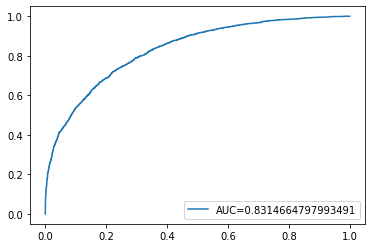

In [34]:
y_pred_proba = logres.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()